# Weather prediction

In [1]:
import pandas as pd
import numpy as np
import ast

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', 500)
plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()

In [2]:
df_raw = pd.read_csv('../data/open_weather/combined_data.csv', parse_dates=['dt'])

In [3]:
# Flatten weather dict
weather_flatted = (pd
                   .json_normalize(
                       df_raw['weather'].map(ast.literal_eval) 
                   )
                   .add_prefix('weather.'))
weather_flatted.head()

,weather.id,weather.main,weather.description,weather.icon
0,701,Mist,mist,50n
1,701,Mist,mist,50n
2,800,Clear,clear sky,01n
3,800,Clear,clear sky,01n
4,800,Clear,clear sky,01n


In [4]:
df = pd.concat([df_raw.drop(['weather', 'weather_id'], axis=1), weather_flatted], axis=1)

In [5]:
df.head()

,dt,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,visibility,wind_speed,wind_deg,rain,wind_gust,uvi,location,weather.id,weather.main,weather.description,weather.icon
0,2011-12-31,05:22:24,18:56:12,20.15,20.60,1011,91,18.63,100,5000.0,3.6,110,0.66,NaN,NaN,Sao Paulo,701,Mist,mist,50n
1,2012-01-01,05:23:02,18:56:30,18.04,18.25,1010,90,16.38,100,8000.0,3.6,200,0.00,NaN,NaN,Sao Paulo,701,Mist,mist,50n
2,2012-01-02,05:23:40,18:56:47,18.39,18.30,1011,77,14.29,0,10000.0,2.1,160,0.00,NaN,NaN,Sao Paulo,800,Clear,clear sky,01n
3,2012-01-03,05:24:19,18:57:02,19.91,19.94,1015,76,15.56,0,10000.0,3.1,180,0.00,NaN,NaN,Sao Paulo,800,Clear,clear sky,01n
4,2012-01-04,05:24:58,18:57:17,20.22,20.26,1016,75,15.65,0,10000.0,4.1,120,0.00,NaN,NaN,Sao Paulo,800,Clear,clear sky,01n


In [6]:
df.shape

(4108, 20)

In [7]:
df['dt'].max()

Timestamp('2023-03-30 00:00:00')

In [8]:
df['dt'].min()

Timestamp('2011-12-31 00:00:00')

In [9]:
# def feat_eng(df_):
#     df_new = df.assign(
#         temp_mva30d=df_['temp'].rolling(30, min_periods=0).mean(),
#         temp_mva7d=df_['temp'].rolling(7, min_periods=0).mean(),
#         temp_mvmin30d=df_['temp'].rolling(30, min_periods=0).min(),
#         temp_mvmax30d=df_['temp'].rolling(30, min_periods=0).max(),
#         season=pd.NA
#     )
    
#     unique_years = df_['dt'].dt.year.unique()
    
#     for yr in unique_years:
#         mask_summer = np.where((df_['dt'] >= f'{yr}-12-22') & (df_['dt'] <= f'{yr+1}-03-19'))
#         df_new.loc[mask_summer, 'season'] = 'Summer'
#         mask_fall = np.where((df_['dt'] >= f'{yr}-03-20') & (df_['dt'] <= f'{yr}-06-20'))
#         df_new.loc[mask_fall, 'season'] = 'Fall'
#         mask_winter = np.where((df_['dt'] >= f'{yr}-06-21') & (df_['dt'] <= f'{yr}-09-22'))
#         df_new.loc[mask_winter, 'season'] = 'Winter'
#         mask_spring = np.where((df_['dt'] >= f'{yr}-09-23') & (df_['dt'] <= f'{yr}-12-21'))
#         df_new.loc[mask_spring, 'season'] = 'Spring'
        
#         # df_new['season'] = np.select(
#         #     condlist=[mask_summer, mask_fall, mask_winter, mask_spring],
#         #     choicelist=['Summer', 'Fall', 'Winter', 'Spring']
#         # )
#     return df_new

# df_test = feat_eng(df)

In [10]:
# Feature engineering
df = df.assign(
    temp_mva30d=df['temp'].rolling(30, min_periods=0).mean(),
    temp_mva7d=df['temp'].rolling(7, min_periods=0).mean(),
    temp_mvmin30d=df['temp'].rolling(30, min_periods=0).min(),
    temp_mvmax30d=df['temp'].rolling(30, min_periods=0).max(),
)

Data das estações:
- Verão: 22 de dezembro a 20 de março;
- Outono: 20 de março a 21 de junho;
- Inverno: 21 de junho a 23 de setembro;
- Primavera: 22/23 de setembro a 22 de dezembro

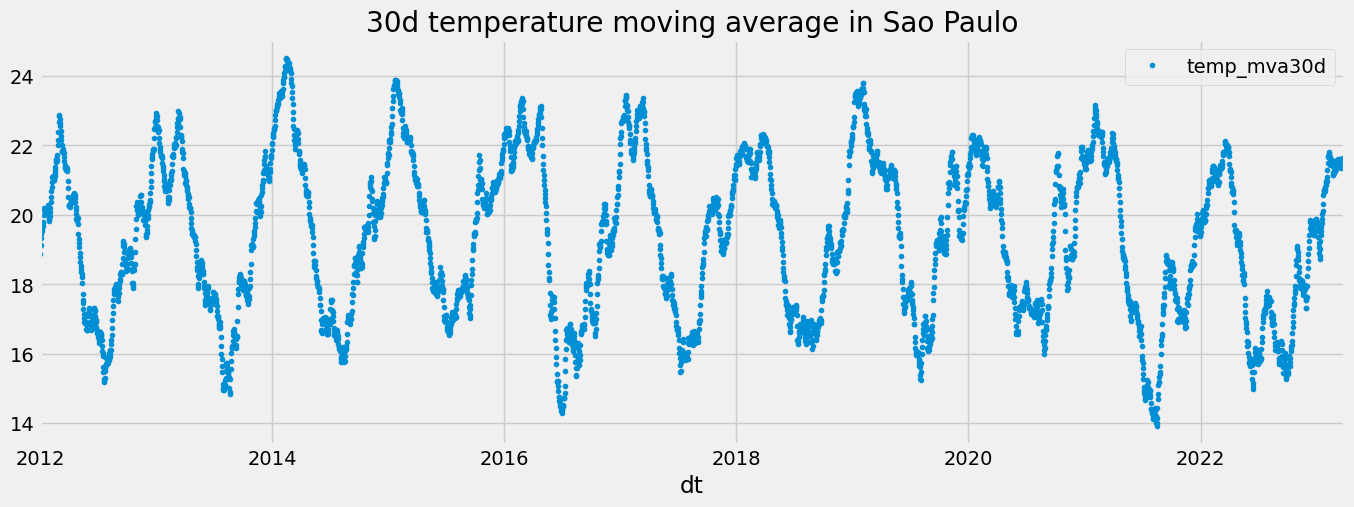

In [11]:
df.plot(style='.',
        x='dt', y='temp_mva30d',
        figsize=(15, 5),
        #color=color_pal[1],
        title='30d temperature moving average in Sao Paulo')
plt.show()

In [12]:
unique_years = df['dt'].dt.year.unique()

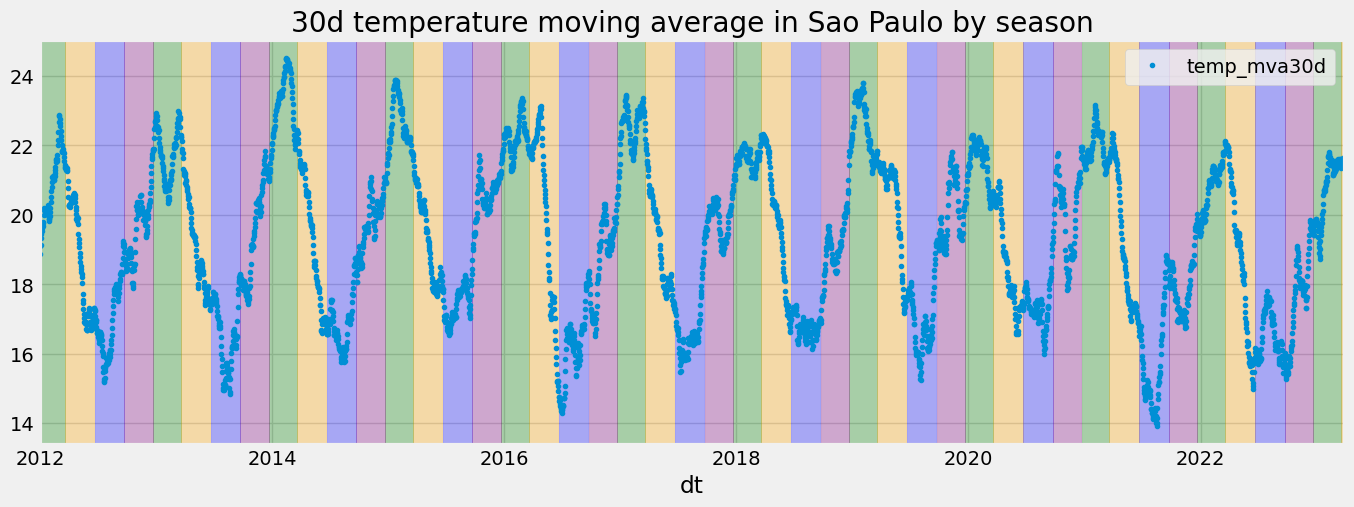

In [13]:
df.plot(style='.',
        x='dt', y='temp_mva30d',
        figsize=(15, 5),
        #color=color_pal[1],
        title='30d temperature moving average in Sao Paulo by season')
for yr in unique_years:
    plt.axvspan(f'{yr}-12-22', f'{yr+1}-03-19', color='green', alpha=0.3, label='Verão') # Versão
    plt.axvspan(f'{yr}-03-20', f'{yr}-06-20', color='orange', alpha=0.3, label='Outono') # Outono
    plt.axvspan(f'{yr}-06-21', f'{yr}-09-22', color='blue', alpha=0.3, label='Inverno') # Inverno
    plt.axvspan(f'{yr}-09-23', f'{yr}-12-21', color='purple', alpha=0.3, label='Primavera') # Primavera
#plt.legend()
plt.show()

Text(0.62, 0.83, 'Avg=19.3 ºC')

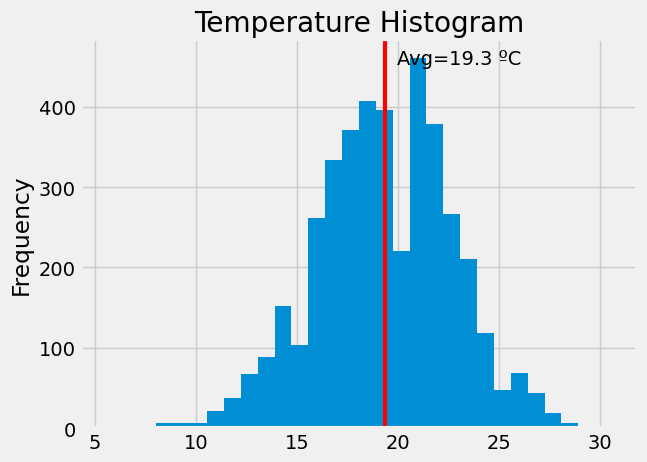

In [14]:
df['temp'].plot(kind='hist', bins=30, title='Temperature Histogram')
#plt.axvline(df['temp'].mean())
mean_temp=df['temp'].mean()
plt.axvline(x=mean_temp, color='red', linewidth=3, label='Avg')
plt.annotate(text=f'Avg={mean_temp:.1f} ºC',xy=(0.62, 0.83), xycoords='figure fraction')
#plt.legend()

## Time Series Cross Validation

In [15]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=7)

In [16]:
sorted_df = df.set_index('dt').sort_index()
sorted_df.head()

,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,visibility,wind_speed,wind_deg,rain,wind_gust,uvi,location,weather.id,weather.main,weather.description,weather.icon,temp_mva30d,temp_mva7d,temp_mvmin30d,temp_mvmax30d
dt,,,,,,,,,,,,,,,,,,,,,,,
2011-12-31,05:22:24,18:56:12,20.15,20.60,1011,91,18.63,100,5000.0,3.6,110,0.66,NaN,NaN,Sao Paulo,701,Mist,mist,50n,20.1500,20.1500,20.15,20.15
2012-01-01,05:23:02,18:56:30,18.04,18.25,1010,90,16.38,100,8000.0,3.6,200,0.00,NaN,NaN,Sao Paulo,701,Mist,mist,50n,19.0950,19.0950,18.04,20.15
2012-01-02,05:23:40,18:56:47,18.39,18.30,1011,77,14.29,0,10000.0,2.1,160,0.00,NaN,NaN,Sao Paulo,800,Clear,clear sky,01n,18.8600,18.8600,18.04,20.15
2012-01-03,05:24:19,18:57:02,19.91,19.94,1015,76,15.56,0,10000.0,3.1,180,0.00,NaN,NaN,Sao Paulo,800,Clear,clear sky,01n,19.1225,19.1225,18.04,20.15
2012-01-04,05:24:58,18:57:17,20.22,20.26,1016,75,15.65,0,10000.0,4.1,120,0.00,NaN,NaN,Sao Paulo,800,Clear,clear sky,01n,19.3420,19.3420,18.04,20.22


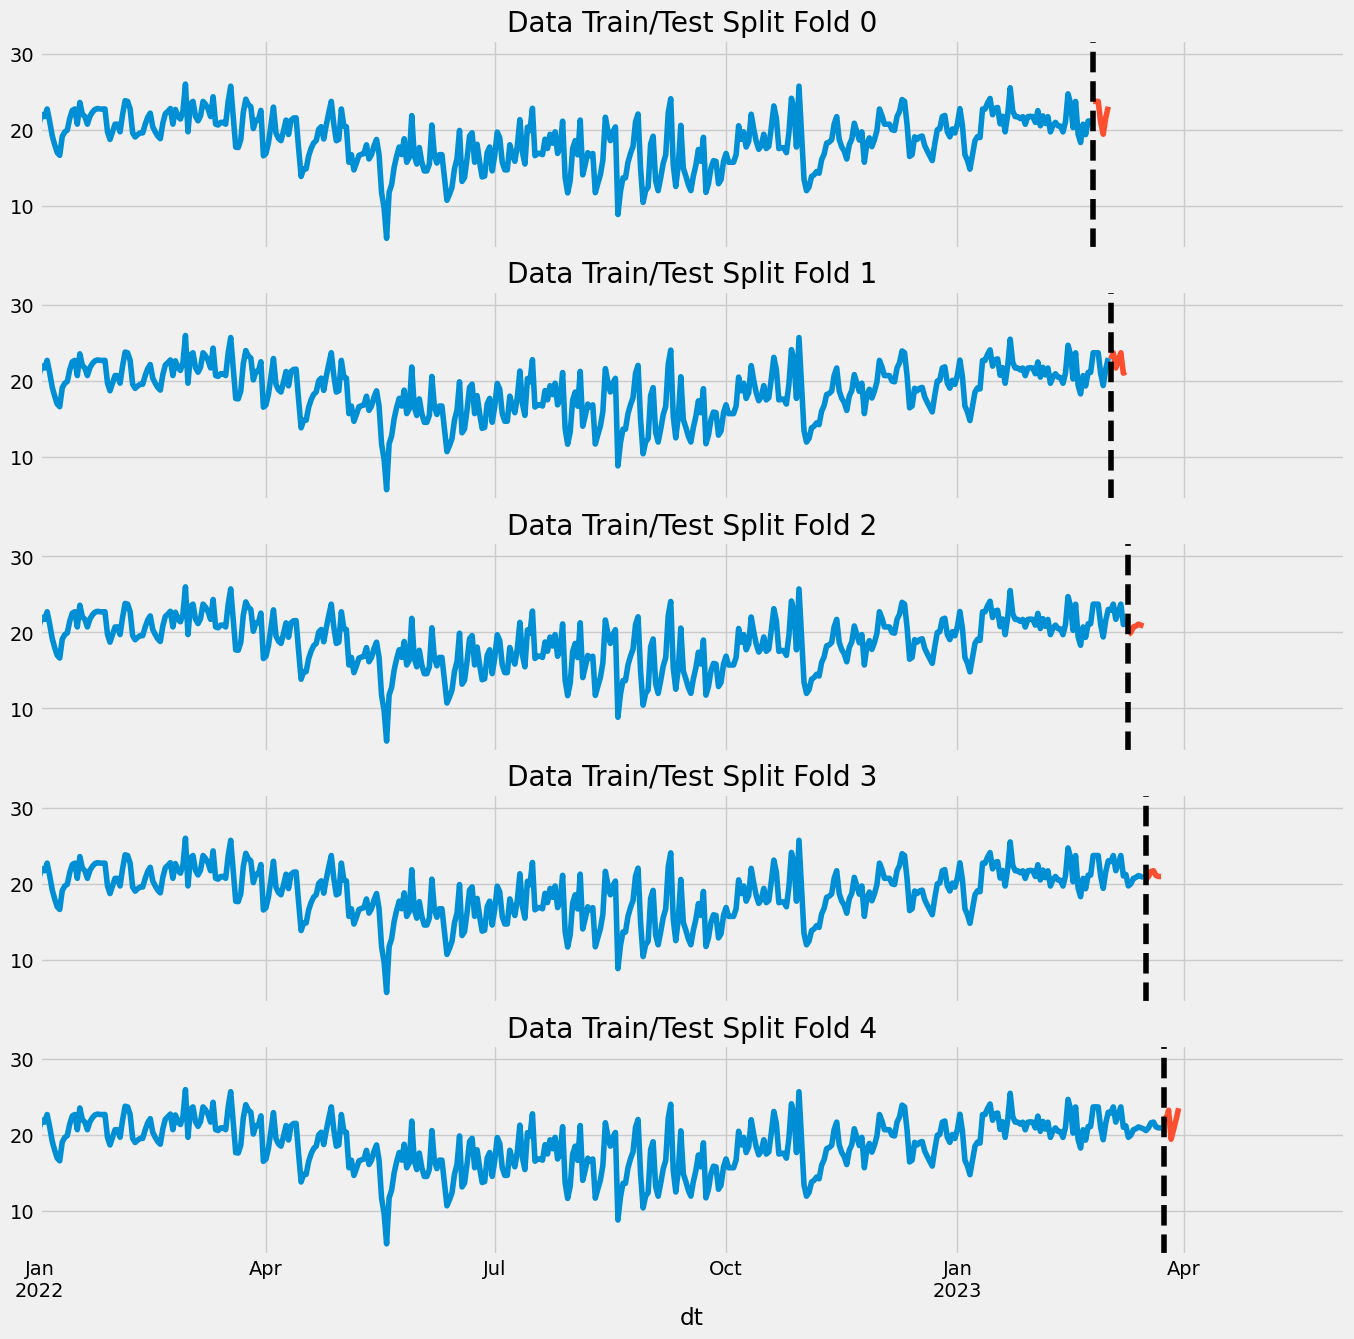

In [17]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(sorted_df):
    train = sorted_df.iloc[train_idx]
    test = sorted_df.iloc[val_idx]
    train['temp'].plot(ax=axs[fold],
                       x='year', y='temp',
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['temp'].plot(ax=axs[fold],
                      x='year', y='temp',
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.xlim('2022-01-01', '2023-06-04')
#plt.suptitle('Cross Validation Folds', size=24, weight='bold')
#plt.tight_layout()
plt.show()

## Forecast Horizon explained

The forecast horizon is the length of time into the future for which forecasts are to be prepared. These generally vary from short-term forecasting horizons (less than three months) to long-term horizons (more than two years).



In [18]:
def create_features(df_):
    """
    Create time series features based on time series index.
    """
    return df_.assign(
        hour=df_.index.hour,
        dayofweek=df_.index.dayofweek,
        quarter=df_.index.quarter,
        month=df_.index.month,
        year=df_.index.year,
        dayofyear=df_.index.dayofyear,
        dayofmonth=df_.index.day,
        weekofyear=df_.index.isocalendar().week,
    )

sorted_df = create_features(sorted_df)

## Lag Features

What was the target (x) days in the past

In [19]:
def add_lags(df_):
    target_map = df_['temp'].to_dict()
    
    new_df = df.assign(
        lag7d= (df_.index - pd.Timedelta('7 days')).map(target_map),
        lag14d= (df_.index - pd.Timedelta('14 days')).map(target_map),
        lag21d= (df_.index - pd.Timedelta('21 days')).map(target_map)
    )
    
    return new_df.dropna(subset=['lag7d', 'lag14d', 'lag21d']) # Droping first 21d

In [26]:
def preprocess(df_):
    cols_to_drop = ['sunrise', 'sunset', 'uvi', 'location', 'weather.main', 'weather.description', 'weather.icon']
    return df_.drop(cols_to_drop, axis=1)

In [27]:
train_set = preprocess(add_lags(sorted_df))
train_set.head()

,dt,temp,feels_like,pressure,humidity,dew_point,clouds,visibility,wind_speed,wind_deg,rain,wind_gust,weather.id,temp_mva30d,temp_mva7d,temp_mvmin30d,temp_mvmax30d,lag7d,lag14d,lag21d
21,2012-01-21,18.69,18.91,1018,88,16.66,75,8000.0,2.1,290,0.0,NaN,500,20.031364,19.730000,18.04,22.59,22.59,20.19,20.15
22,2012-01-22,20.11,20.47,1016,88,18.06,0,10000.0,2.6,300,0.0,NaN,800,20.034783,19.678571,18.04,22.59,20.47,19.94,18.04
23,2012-01-23,21.24,21.27,1015,71,15.78,0,10000.0,3.1,320,0.0,NaN,721,20.085000,19.857143,18.04,22.59,19.99,19.91,18.39
24,2012-01-24,22.06,22.20,1017,72,16.78,0,10000.0,3.6,330,0.0,NaN,800,20.164000,20.241429,18.04,22.59,19.37,19.73,19.91
25,2012-01-25,23.05,23.08,1014,64,15.88,0,10000.0,3.6,50,0.0,NaN,800,20.275000,20.774286,18.04,23.05,19.32,20.63,20.22


In [33]:
print(train_set.head().to_markdown())

|    | dt                  |   temp |   feels_like |   pressure |   humidity |   dew_point |   clouds |   visibility |   wind_speed |   wind_deg |   rain |   wind_gust |   weather.id |   temp_mva30d |   temp_mva7d |   temp_mvmin30d |   temp_mvmax30d |   lag7d |   lag14d |   lag21d |
|---:|:--------------------|-------:|-------------:|-----------:|-----------:|------------:|---------:|-------------:|-------------:|-----------:|-------:|------------:|-------------:|--------------:|-------------:|----------------:|----------------:|--------:|---------:|---------:|
| 21 | 2012-01-21 00:00:00 |  18.69 |        18.91 |       1018 |         88 |       16.66 |       75 |         8000 |          2.1 |        290 |      0 |         nan |          500 |       20.0314 |      19.73   |           18.04 |           22.59 |   22.59 |    20.19 |    20.15 |
| 22 | 2012-01-22 00:00:00 |  20.11 |        20.47 |       1016 |         88 |       18.06 |        0 |        10000 |          2.6 |        300 |  

In [35]:
print(train_set.columns)

Index(['dt', 'temp', 'feels_like', 'pressure', 'humidity', 'dew_point',
       'clouds', 'visibility', 'wind_speed', 'wind_deg', 'rain', 'wind_gust',
       'weather.id', 'temp_mva30d', 'temp_mva7d', 'temp_mvmin30d',
       'temp_mvmax30d', 'lag7d', 'lag14d', 'lag21d'],
      dtype='object')


In [29]:
train_set.dtypes.value_counts()

float64           14
int64              5
datetime64[ns]     1
dtype: int64

## Treinando LSTM

In [37]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

In [39]:
# Define the number of time steps for the LSTM model
n_steps = 7

# Create sequences of n_steps for the input and output variables
def create_sequences(data, n_steps):
    X = []
    y_temp = []
    y_weather = []
    for i in range(len(data)-n_steps):
        X.append(data.iloc[i:i+n_steps, [1, 12]].values)
        y_temp.append(data.iloc[i+n_steps, 1])
        y_weather.append(data.iloc[i+n_steps, 12])
    return np.array(X), np.array(y_temp), np.array(y_weather)

# Create sequences for the input and output variables
X, y_temp, y_weather = create_sequences(train_set, n_steps)

# Scale the input variables to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X.reshape(-1, 2)).reshape(-1, n_steps, 2)

# Convert the weather ids to one-hot encoded vectors
y_weather_cat = to_categorical(y_weather)

In [47]:
X.shape

(4080, 7, 2)

In [48]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(n_steps, 2), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.add(Dense(y_weather_cat.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the LSTM model to the training data
history = model.fit(X_scaled, [y_temp, y_weather_cat], epochs=100, batch_size=64, validation_split=0.2)

# Define a function to predict the temperature and weather for the next 7 days
def predict_next_7_days(model, data):
    X = data[-n_steps:, [1, 12]].values.reshape(1, n_steps, 2)
    X_scaled = scaler.transform(X.reshape(-1, 2)).reshape(-1, n_steps, 2)
    y_temp_pred, y_weather_pred = model.predict(X_scaled)
    y_temp_pred = y_temp_pred[0]
    y_weather_pred = np.argmax(y_weather_pred, axis=1)[0]
    return y_temp_pred, y_weather_pred

# Test the LSTM model on a sample input
sample_input = train_set.iloc[[-n_steps-1]]
y_temp_pred, y_weather_pred = predict_next_7_days(model, sample_input)
print('Predicted temperature for the next 7 days:', y_temp_pred)
print('Predicted weather id for the next 7 days:', y_weather_pred)


Epoch 1/100


ValueError: in user code:

    File "C:\Users\lucas\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\lucas\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\lucas\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\lucas\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\lucas\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\lucas\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\lucas\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\lucas\anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\lucas\anaconda3\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\lucas\anaconda3\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (64, 1) and (64, 805) are incompatible


In [58]:
y_weather_cat.shape

(4080, 805)

## Próximos passos
- definir e treinar uma rede neural que prevê a temperatura pros próximos 7 dias e o clima
- visualizar a categoria de clima ao longo do tempo (gráfico de barras empilhadas? gráfico de linhas com área?)
- trainar modelo arima

## Dúvidas
- qual é a nossa janela de previsão? vou estipular 1 semana

## References

[PT2: Time Series Forecasting with XGBoost](https://www.kaggle.com/code/robikscube/pt2-time-series-forecasting-with-xgboost/notebook)